In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
x = data.iloc[:,1:5].values # 1:5 because we want to take only the features / 1:5 çünkü sadece özellikleri almak istiyoruz

In [5]:
y = data.Species.values.reshape(-1,1) # we want to take only the labels / sadece etiketleri almak istiyoruz

In [6]:
B = data[data.Species == 'Iris-setosa']
I = data[data.Species == 'Iris-versicolor']
U = data[data.Species == 'Iris-virginica']  
# we want to take only the features of each class / her sınıfın özelliklerini almak istiyoruz

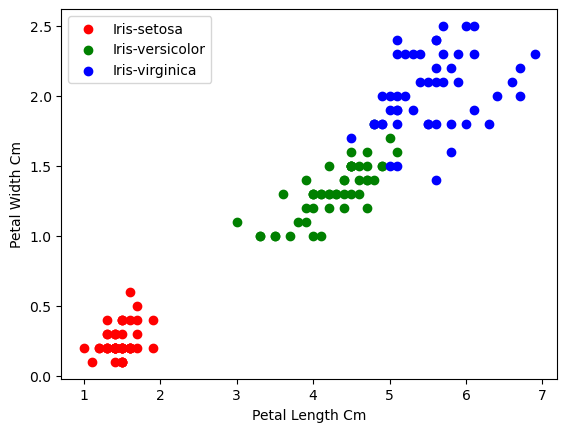

In [7]:
plt.scatter(B.PetalLengthCm,B.PetalWidthCm,color='red',label='Iris-setosa')
plt.scatter(I.PetalLengthCm,I.PetalWidthCm,color='green',label='Iris-versicolor')
plt.scatter(U.PetalLengthCm,U.PetalWidthCm,color='blue',label='Iris-virginica')
plt.xlabel('Petal Length Cm')
plt.ylabel('Petal Width Cm')
plt.legend()
plt.show()  


In [8]:
from sklearn.model_selection import train_test_split # we will use this library to split our data into training and testing data / verimizi eğitim ve test verisine bölmek için bu kütüphaneyi kullanacağız
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 44)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # we will use this library to scale our data / verimizi ölçeklendirmek için bu kütüphaneyi kullanacağız

xtrain = sc.fit_transform(x_train)  # we will scale our training data / eğitim verimizi ölçeklendireceğiz
xtest = sc.transform(x_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier 
rm = RandomForestClassifier(n_estimators=30,criterion='entropy',random_state=22 ) # we use Random Forest Classifier to classify our data / verimizi sınıflandırmak için Random Forest Classifier kullanacağız
# n_estimators = number of trees in the forest / ormanın içindeki ağaç sayısı

In [11]:
rm.fit(xtrain,y_train) # we will fit our training data / eğitim verimizi uygun hale getireceğiz
yhead = rm.predict(xtest)   # we will predict our testing data / test verimizi tahmin edeceğiz
rm.score(xtest,y_test) # we will find the accuracy of our model / modelimizin doğruluğunu bulacağız

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9777777777777777

In [12]:
from sklearn.metrics import confusion_matrix    
cm = confusion_matrix(y_test,yhead)
cm

array([[17,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 14]], dtype=int64)

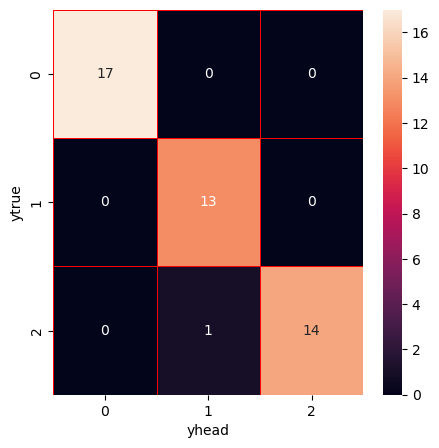

In [13]:
import seaborn as sns   
f, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("yhead") # yhead is the predicted value / yhead tahmin edilen değer
plt.ylabel("ytrue") # ytrue is the true value / ytrue gerçek değer
plt.show()

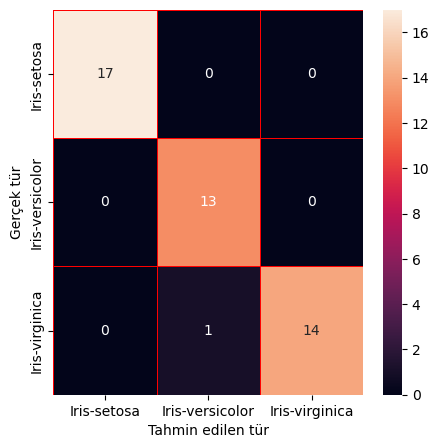

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Çiçek türleri / Flower species
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax, xticklabels=species, yticklabels=species)

plt.xlabel("Tahmin edilen tür")
plt.ylabel("Gerçek tür")
plt.show()

In [15]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# Kullanıcıdan dört özelliği alın (sepal_length, sepal_width, petal_length, petal_width) / Take four features from the user (sepal_length, sepal_width, petal_length, petal_width)
sepal_length = float(input("Çanak yaprağının uzunluğunu cm cinsinden giriniz: "))
sepal_width = float(input("Çanak yaprağının genişliğini cm cinsinden giriniz: "))
petal_length = float(input("Taç yaprağının uzunluğunu cm cinsinden giriniz: "))
petal_width = float(input("Taç yaprağının genişliğini cm cinsinden giriniz: "))

# Modelin beklediği formatta özellikleri hazırlayın / Prepare the features in the expected format of the model
features = [[sepal_length, sepal_width, petal_length, petal_width]]

# Özellikleri ölçeklendirin (eğer model ölçeklendirilmiş veri üzerinde eğitildiyse) / Scale the features (if the model was trained on scaled data)
features_scaled = sc.transform(features)

# Tahmini yapın / Make the prediction
prediction = rm.predict(features_scaled)

# Tahmini yazdırın / Print the prediction
print(f"Tahmin edilen tür: {prediction[0]}")


Tahmin edilen tür: Iris-setosa


In [18]:
y

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se